In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

mp.rcParams['figure.figsize']=(10,8)
mp.rcParams['axes.grid']=False

In [2]:
df = pd.read_csv('AMAZON ALL RATIO.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                                 datetime64[ns]
Current_Assets_in_USD_ in_B                 float64
Current_Liailities_in_USD_ in_B             float64
Current_Ratio                               float64
Long_Term_Det_in_USD_ in_B                  float64
Shareholder's_Equityin_USD_ in _B           float64
Det_to_Equity_Ratio                         float64
Stock_Price                                 float64
TTM_Net_EPS                                 float64
PE_Ratio                                    float64
Book_Value_per_Share_in_USD                 float64
Price_to_Book_Ratio                         float64
TTM_Sales_per_Share_in _USD                 float64
Price_to_Sales_Ratio                        float64
TTM_Net_Income                              float64
Shareholder's_Equity                        float64
Return_on_Equity                            float64
dtype: object

In [3]:
df.head()

,Date,Current_Assets_in_USD_ in_B,Current_Liailities_in_USD_ in_B,Current_Ratio,Long_Term_Det_in_USD_ in_B,Shareholder's_Equityin_USD_ in _B,Det_to_Equity_Ratio,Stock_Price,TTM_Net_EPS,PE_Ratio,Book_Value_per_Share_in_USD,Price_to_Book_Ratio,TTM_Sales_per_Share_in _USD,Price_to_Sales_Ratio,TTM_Net_Income,Shareholder's_Equity,Return_on_Equity
0,2022-03-31,133.88,139.51,0.96,276.77,134.00,2.07,163.00,2.07,78.69,13.16,12.38,46.54,3.50,21.41,134.00,16.87
1,2021-12-31,161.58,142.27,1.14,282.30,138.25,2.04,166.72,3.24,51.47,13.58,12.28,45.68,3.65,33.36,138.25,27.98
2,2021-09-30,138.53,123.99,1.12,261.84,120.56,2.17,164.25,2.56,64.26,11.89,13.81,44.64,3.68,26.26,120.56,24.31
3,2021-06-30,140.85,117.79,1.20,245.52,114.80,2.14,172.01,2.87,59.96,11.34,15.16,43.28,3.97,29.44,114.80,29.86
4,2021-03-31,121.41,115.40,1.05,219.76,103.32,2.13,154.70,2.63,58.88,10.25,15.09,41.01,3.77,26.90,103.32,30.47


In [4]:
#df = df.reindex(columns=['Year','GDPPerCapitaUSD','AnnualGrowthRate','UnemploymentRate','InflationRate','GovernmentDebt%ofGDP','MarketCapitalGDPRatio','Import_USD','Export_USD','Import-Export_USD','Life_Expectancy'])
#df.head()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

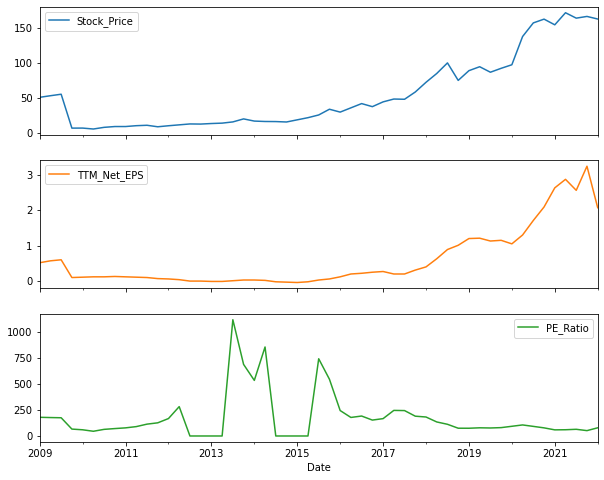

In [5]:
df.set_index('Date')[['Stock_Price','TTM_Net_EPS','PE_Ratio']].plot(subplots=True)

In [6]:
df_input = df[['Date','PE_Ratio','Stock_Price','TTM_Net_EPS']]

In [7]:
df_input = df_input.set_index('Date')

In [8]:
df_input

,PE_Ratio,Stock_Price,TTM_Net_EPS
Date,,,
2022-03-31,78.690000,163.000000,2.070000
2021-12-31,51.470000,166.720000,3.240000
2021-09-30,64.260000,164.250000,2.560000
2021-06-30,59.960000,172.010000,2.870000
2021-03-31,58.880000,154.700000,2.630000
2020-12-31,77.970000,162.850000,2.090000
2020-09-30,92.200000,157.440000,1.710000
2020-06-30,106.070000,137.940000,1.300000
2020-03-31,93.150000,97.490000,1.050000


In [9]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [10]:
data_scaled

array([[0.07047476, 0.94590213, 0.64329268],
       [0.04609653, 0.96823777, 1.        ],
       [0.05755125, 0.95340739, 0.79268293],
       [0.05370017, 1.        , 0.88719512],
       [0.05273292, 0.89606725, 0.81402439],
       [0.06982993, 0.9450015 , 0.64939024],
       [0.08257431, 0.91251876, 0.53353659],
       [0.09499628, 0.79543681, 0.40853659],
       [0.08342513, 0.5525668 , 0.33231707],
       [0.07192563, 0.52194536, 0.36280488],
       [0.06885372, 0.48838187, 0.35670732],
       [0.07036729, 0.53569499, 0.38109756],
       [0.06658785, 0.50183128, 0.37804878],
       [0.06682071, 0.41813269, 0.32012195],
       [0.10055796, 0.56853798, 0.28353659],
       [0.12072687, 0.47751426, 0.20426829],
       [0.16324995, 0.40174122, 0.13414634],
       [0.17030728, 0.3182828 , 0.10670732],
       [0.21852638, 0.25583909, 0.07317073],
       [0.22003994, 0.25782047, 0.07317073],
       [0.14924277, 0.23338337, 0.0945122 ],
       [0.13677602, 0.19231462, 0.08841463],
       [0.

In [11]:
features = data_scaled
target = data_scaled[:,0]

In [12]:
TimeseriesGenerator(features, target, length=1 , sampling_rate=1, batch_size=1)[0]

(array([[[0.07047476, 0.94590213, 0.64329268]]]), array([0.04609653]))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

In [14]:
x_train.shape

(42, 3)

In [15]:
x_test.shape

(11, 3)

In [16]:
win_length = 1
batch_size = 10
num_features = 3
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [17]:
train_generator[0]

(array([[[0.07047476, 0.94590213, 0.64329268]],
 
        [[0.04609653, 0.96823777, 1.        ]],
 
        [[0.05755125, 0.95340739, 0.79268293]],
 
        [[0.05370017, 1.        , 0.88719512]],
 
        [[0.05273292, 0.89606725, 0.81402439]],
 
        [[0.06982993, 0.9450015 , 0.64939024]],
 
        [[0.08257431, 0.91251876, 0.53353659]],
 
        [[0.09499628, 0.79543681, 0.40853659]],
 
        [[0.08342513, 0.5525668 , 0.33231707]],
 
        [[0.07192563, 0.52194536, 0.36280488]]]),
 array([0.04609653, 0.05755125, 0.05370017, 0.05273292, 0.06982993,
        0.08257431, 0.09499628, 0.08342513, 0.07192563, 0.06885372]))

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(120, input_shape=(win_length,num_features), return_sequences=True, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.LSTM(60, return_sequences=True, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(80, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 120)            59520     
                                                                 
 dropout (Dropout)           (None, 1, 120)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 60)             43440     
                                                                 
 dropout_1 (Dropout)         (None, 1, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 80)                45120     
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense (Dense)               (None, 1)                 8

In [20]:
model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()]
)

history = model.fit(train_generator,epochs=25,
                             validation_data=test_generator,
                             shuffle=False,
)

Epoch 1/25
5/5 [==============================] - 6s 182ms/step - loss: 0.0788 - mean_absolute_error: 0.1741 - val_loss: 0.0072 - val_mean_absolute_error: 0.0711
Epoch 2/25
5/5 [==============================] - 0s 11ms/step - loss: 0.0730 - mean_absolute_error: 0.1626 - val_loss: 0.0049 - val_mean_absolute_error: 0.0527
Epoch 3/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0671 - mean_absolute_error: 0.1496 - val_loss: 0.0032 - val_mean_absolute_error: 0.0369
Epoch 4/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0621 - mean_absolute_error: 0.1390 - val_loss: 0.0022 - val_mean_absolute_error: 0.0362
Epoch 5/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0582 - mean_absolute_error: 0.1358 - val_loss: 0.0021 - val_mean_absolute_error: 0.0436
Epoch 6/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0553 - mean_absolute_error: 0.1380 - val_loss: 0.0028 - val_mean_absolute_error: 0.0514
Epoch 7/25
5/5 [=================

In [21]:
model.save('amazone_prediction.h5')

In [22]:
model.evaluate_generator(test_generator, verbose=0)

C:\Users\aayus\AppData\Local\Temp\ipykernel_6764\1625521884.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.010188579559326172, 0.08772844821214676]

In [23]:
prediction=model.predict_generator(test_generator)

C:\Users\aayus\AppData\Local\Temp\ipykernel_6764\3104476467.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediction=model.predict_generator(test_generator)


In [24]:
prediction.shape[0]

10

In [25]:
prediction

array([[0.18473901],
       [0.18190113],
       [0.1806054 ],
       [0.17957476],
       [0.1792715 ],
       [0.17785022],
       [0.17935039],
       [0.1803875 ],
       [0.16625756],
       [0.16785488]], dtype=float32)

In [26]:
y_test

array([0.10192823, 0.08067564, 0.06983888, 0.06372193, 0.0569512 ,
       0.0406065 , 0.05333298, 0.05935141, 0.15677638, 0.15850241,
       0.16075053])

In [27]:
x_test

array([[0.10192823, 0.03212249, 0.04268293],
       [0.08067564, 0.02858001, 0.04573171],
       [0.06983888, 0.02131492, 0.04878049],
       [0.06372193, 0.02125488, 0.05182927],
       [0.0569512 , 0.01435005, 0.04878049],
       [0.0406065 , 0.        , 0.04878049],
       [0.05333298, 0.00798559, 0.04573171],
       [0.05935141, 0.00762534, 0.04268293],
       [0.15677638, 0.29918943, 0.19536585],
       [0.15850241, 0.28625518, 0.18640732],
       [0.16075053, 0.27261553, 0.17013546]])

In [28]:
x_test[:,1:][win_length:]

array([[0.02858001, 0.04573171],
       [0.02131492, 0.04878049],
       [0.02125488, 0.05182927],
       [0.01435005, 0.04878049],
       [0.        , 0.04878049],
       [0.00798559, 0.04573171],
       [0.00762534, 0.04268293],
       [0.29918943, 0.19536585],
       [0.28625518, 0.18640732],
       [0.27261553, 0.17013546]])

In [29]:
df_pred = pd.concat([pd.DataFrame(prediction), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [30]:
rev_transform = scaler.inverse_transform(df_pred)

In [31]:
rev_transform

array([[2.06274035e+02, 1.02200000e+01, 1.10000000e-01],
       [2.03105341e+02, 9.01000000e+00, 1.20000000e-01],
       [2.01658568e+02, 9.00000000e+00, 1.30000000e-01],
       [2.00507787e+02, 7.85000000e+00, 1.20000000e-01],
       [2.00169184e+02, 5.46000000e+00, 1.20000000e-01],
       [1.98582216e+02, 6.79000000e+00, 1.10000000e-01],
       [2.00257266e+02, 6.73000000e+00, 1.00000000e-01],
       [2.01415267e+02, 5.52900000e+01, 6.00800000e-01],
       [1.85638204e+02, 5.31358000e+01, 5.71416000e-01],
       [1.87421718e+02, 5.08641160e+01, 5.18044320e-01]])

In [32]:
df_final = df_input[prediction.shape[0]*-1:]

In [33]:
df_final['predicted']=rev_transform[:,0]

C:\Users\aayus\AppData\Local\Temp\ipykernel_6764\3772768420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['predicted']=rev_transform[:,0]


In [34]:
df_final

,PE_Ratio,Stock_Price,TTM_Net_EPS,predicted
Date,,,,
2011-06-30,90.080000,10.220000,0.110000,206.274035
2011-03-31,77.980000,9.010000,0.120000,203.105341
2010-12-31,71.150000,9.000000,0.130000,201.658568
2010-09-30,63.590000,7.850000,0.120000,200.507787
2010-06-30,45.340000,5.460000,0.120000,200.169184
2010-03-31,59.550000,6.790000,0.110000,198.582216
2009-12-31,66.270000,6.730000,0.100000,200.257266
2009-09-30,175.051800,55.290000,0.600800,201.415267
2009-06-30,176.979036,53.135800,0.571416,185.638204


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


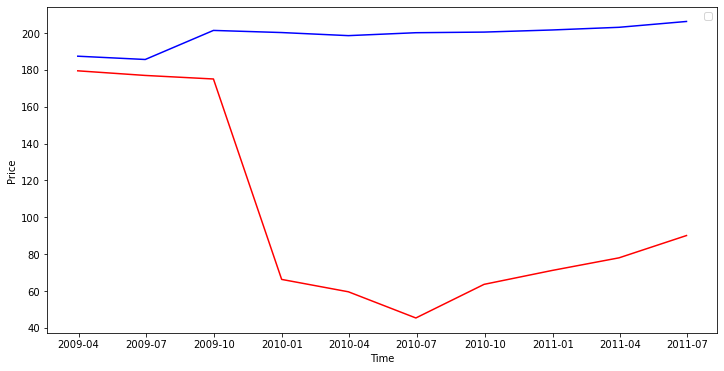

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df_final['PE_Ratio'],'r')
plt.plot(df_final['predicted'],'b')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()